# Research Paper Classifier

## Getting Started

1. make a new python virtual environment
1. activate it
1. run pip install -r requirements.txt



### Data preprocesing

1. download the dataset: https://www.kaggle.com/datasets/1b6883fb66c5e7f67c697c2547022cc04c9ee98c3742f9a4d6c671b4f4eda591?resource=download
1. extract and copy the file "arxiv-metadata-oai-snapshot.json" to "arXiv_processor/data/" and "gans/data/"
1. run `python arXiv_processor/data_cleaning.py`
1. ensure that the output file "with_titles_and_abstract.json", is in gans/data/
1. open the notebook "gans/prep_data.ipynb" (connect your venv as the kernel)
1. run all cells to take a subsample of data and save it
1. open the notebook "gans/gpt2_data_preprocessing.ipynb" and run all cells to prep the transformer dataset(s) for training

Note: The dataset is updated regularly (every couple days), though due to it's size and the lack of space on my machine, I haven't set up a way to automatically download it.

### Finetuning
1. after data preprocessing, in "gans/", run `finetune_gpt2_train_script.py`
1. This will take a long time and you need a good gpu for it.

### Gans Training
1. after finetuning gpt2, run `training.py`
1. this will also take a long time and you need a very good gpu for it.

### Bentoml
You can deploy the model you train with bentoml:
1. run `bentoml build --version <a version number>`
1. run `bentoml containerize papers_classifier:<your version number>`
1. run `docker compose up`

The bento server that launches this is responsible for providing predictions via the model. The streamlit app makes calls to it. You will need to replace the address in streamlit.py with your own local address for this to work

### Streamlit
1. run streamlit streamlit.py to launch the streamlit page locally

### Does it work?

Not really, the training and eval loss graphs all looked mostly like this for the GANs model. 
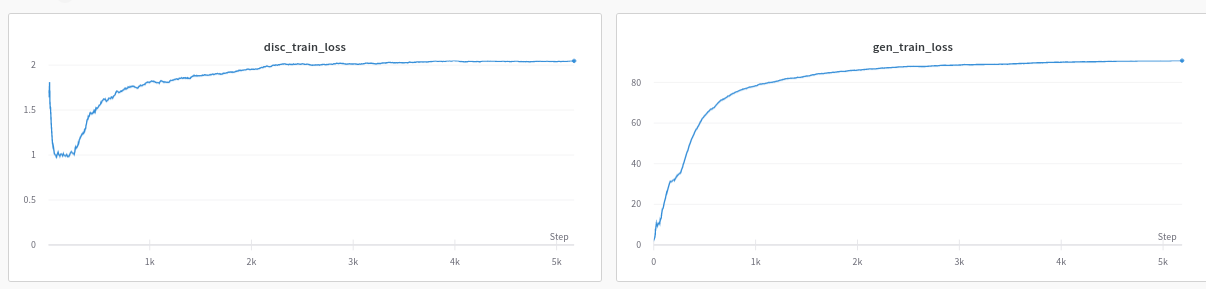

The issue is that the generator was never able to generate convincing enough text for the discriminator to be challenged by. Essentially, most of the text it generated was gibberish, so the discriminator got good at distinguishing real english text from a garble of words.   

I then turned the discriminator to evaluation mode only in the hopes of allowing the generator to catch up (triggered by a loss difference threshold), but, the generator never got better. It is likely that GPT models are not good at learning from this sort of binary output, or that I am simply updating the gradients incorrectly.   

Additionally, I believe this issue is in part due to the finetuning itself, as the generator actually did better when I didn't fine tune it beforehand. I fine tuned it with the intention of making it better at outputting abstracts given titles, but it seems my (relatively short) amount of fine tuning time just ruined the model more than anything.

These are the training graphs from some of my finetuning attempts:
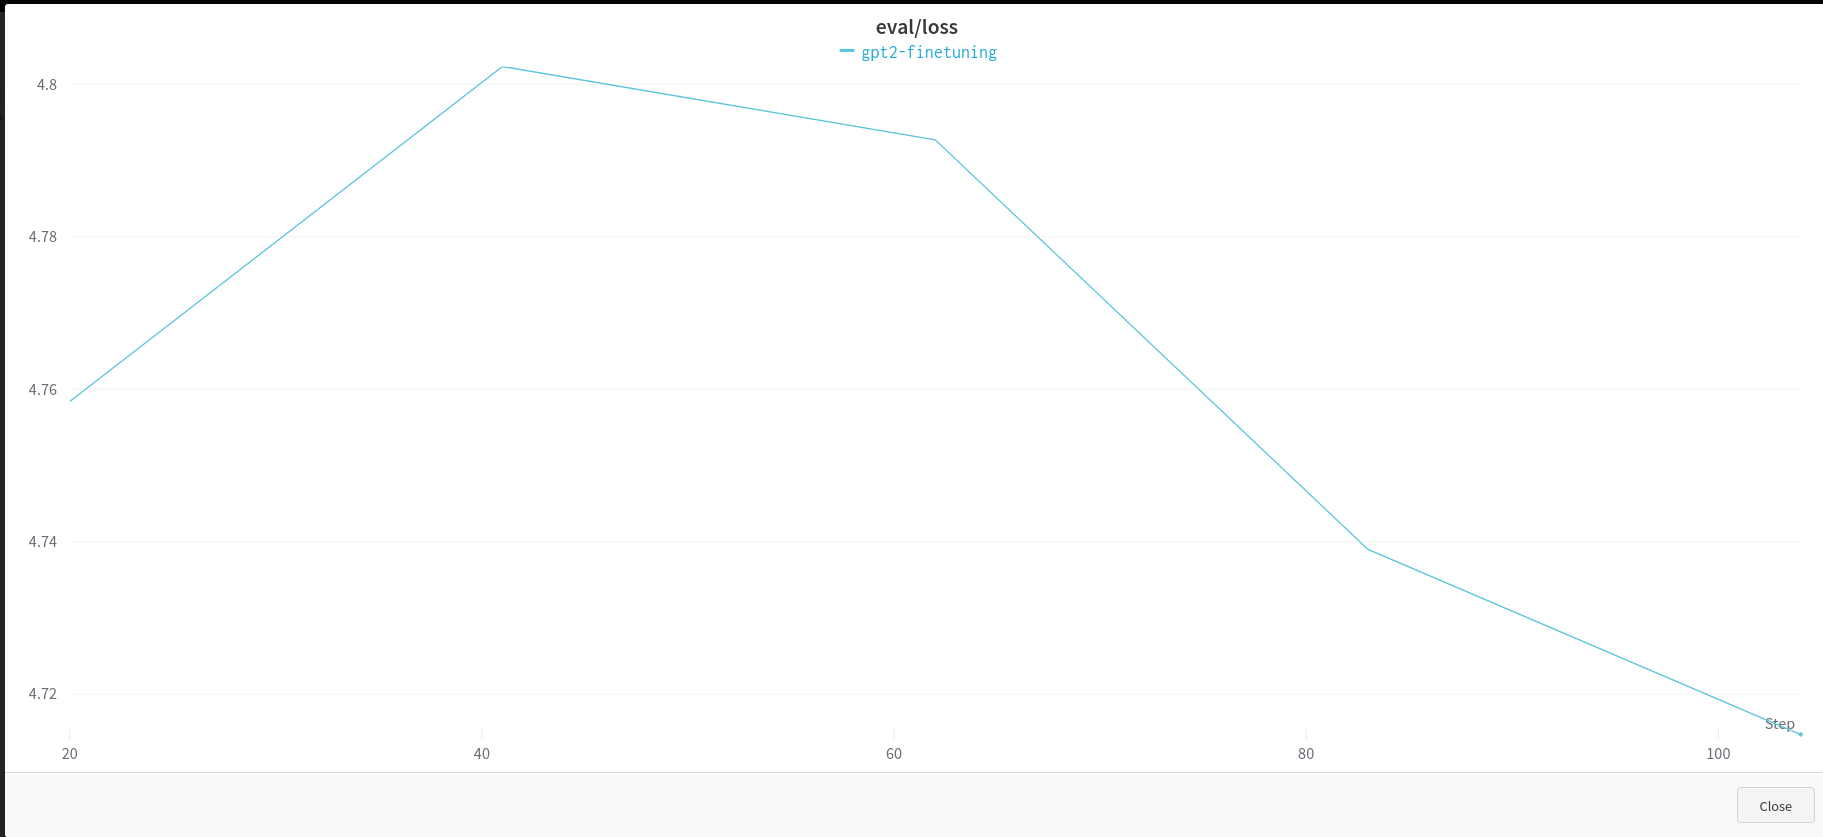
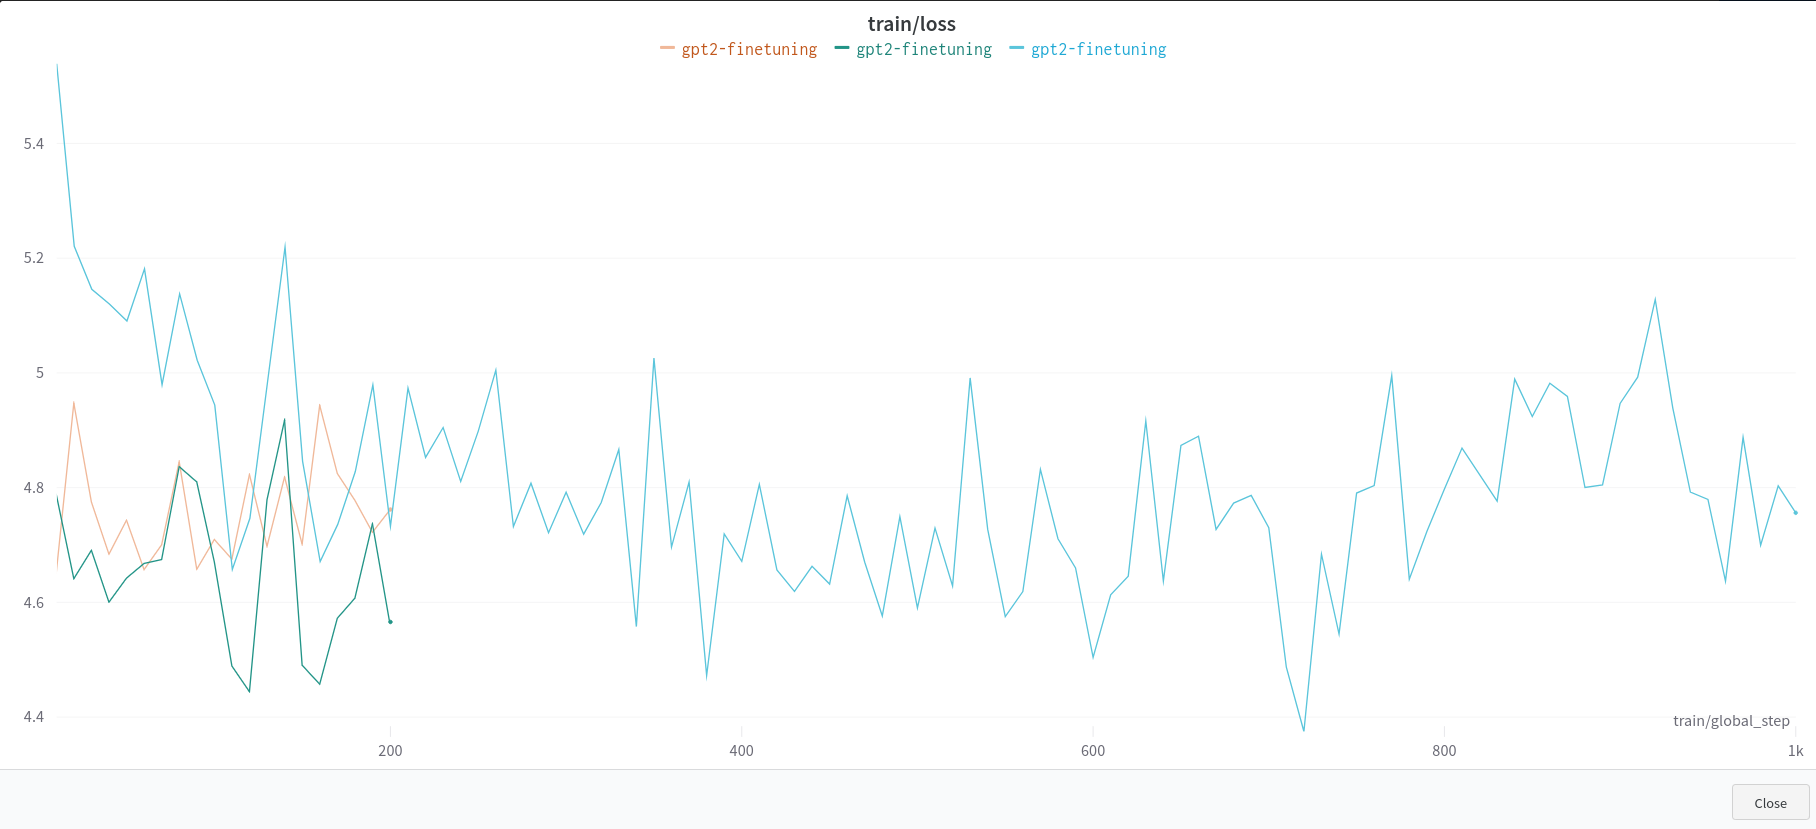

As you can see, it didn't really learn much at all, and I suspect that the fact that I was training it to produce abstracts from titles (rather than predict the next token in the abstract as is traditionally done) has something to do with this. I need to do more research and testing if I want to be able to generate abstracts from titles or papers from abstracts, and almost certainly need more computation time and power, which are issues

### Future work
I plan to attempt to apply this problem, though, as we discussed, it may be impossible soon, using the architecture we designed as a part of the tree translation project. This, being a task that requires generation of text and classification of text, would be a good litmus test for how well our model is able to learn to understand language. This would be my preferred approach rather than trying to secure more computational power/time, as it seems fruitless to do so. 